<a href="https://colab.research.google.com/github/Muhthoriqas/Xilften/blob/master/H071201077_Final_ML_World_Happiness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Machine Learning 

## World Happiness (2015-2019) Prediction Using Multiple Linear Regression

<b><h3>
Nama : Muhammad Thoriq Ali Said
<br/> NIM : H071201077</h3></b>

### This notebook shows some exploratory analysis and visualisation analysis for the World Happiness Reports from the years 2015 until 2019, then applies a Multiple Linear Regression model to predict country's Happiness Score and determine which factors are influence this score.

# Import Library

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#To make colored text
from colorama import Fore, Back, Style 

# Fetch And Load Dataset From Kaggle


In [ ]:
!pip install -q kaggle
from google.colab import files

# Upload Token API Kaggle
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d unsdsn/world-happiness --unzip

In [ ]:
# Load all datasets (2015-2019)
x = 2015
dfs = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'{x}.csv')
    dfs.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

# Data Exploration

In [ ]:
# Show first few records for each dataset
for i, df in enumerate(dfs):
    print (f'{Fore.BLUE} Head 201{i+5} Dataset:')
    display (dfs[i].head(2))

 Head 2015 Dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


 Head 2016 Dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


 Head 2017 Dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


 Head 2018 Dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


 Head 2019 Dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
# show the number of records and columns for each dataset
# print(f"All Dataset Size",L)
for i, df in enumerate(dfs):
    print (f'{Fore.BLUE} Size of 201{i+5} Report:', Style.RESET_ALL, dfs[i].shape)

 Size of 2015 Report:  (158, 12)
 Size of 2016 Report:  (157, 13)
 Size of 2017 Report:  (155, 12)
 Size of 2018 Report:  (156, 9)
 Size of 2019 Report:  (156, 9)


In [ ]:
# Show column names for each dataset
for i, df in enumerate(dfs):
    print (f'{Fore.BLUE} Column names for 201{i+5} Dataset:\n {Style.RESET_ALL}', dfs[i].columns, '\n')

 Column names for 2015 Dataset:
  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

 Column names for 2016 Dataset:
  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

 Column names for 2017 Dataset:
  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

 Column names for 2018 Dat

So multiple data sets have different labels for the same column, Namely:
1. The "Standard Error" column in the 2015 dataset is changed to "upper/lower & high/low values" in the 2016 and 2017 dataset
2. the "Social Support" column in the 2018 and 2018 dataset while in the 2015, 2016 and 2017 dataset is labeled as "Family"
3. The column "Residual Dystopia" is only found in the 2015, 2016 and 2017 datasets. Meanwhile, there are none in the 2018 and 2019 datasets.

# Data Cleaning

### Changing column names in each dataset

In [ ]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [ ]:
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [ ]:
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust'}, inplace = True)

In [ ]:
df2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [ ]:
df2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [ ]:
df.head(3)

,Happiness Rank,Country,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


### Creating "Year" column for each dataset.

In [ ]:
# add year column for each dataset
for i, df in enumerate(dfs, 2015):
    df['Year'] = i

### Adding Region column for both 2018-2019 datasets.

In [ ]:
# add "Region" column
for df in dfs:
    if not ('Region') in df:
        df['Region'] = None
        temp = df.set_index('Country').Region.fillna(df2015.set_index('Country').Region).reset_index()
        df.fillna(temp, inplace = True)

In [ ]:
df.head(3)

,Happiness Rank,Country,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe


### Standard Error Column

We need to calculate the "Standard Error" column for the 2016-2017 dataset based on the Confidence Interval and Whisker values.

In [ ]:
df2016['Standard Error'] = round((df2016['Upper Confidence Interval'] - df2016['Lower Confidence Interval']) / 2, 3)

In [ ]:
df2017['Standard Error'] = round((df2017['Whisker.high'] - df2017['Whisker.low']) / 2, 3)

Then add the "Standard Error" column for the 2017-2019 dataset by calculating the average value of the previous years, for each country. To do this, we need to create a temporary dataframe that combines the "Standard Error" columns for previous years to calculate "Standard Error" values for the 2018-2019 data set.

In [ ]:
temp = pd.merge(df2015[['Country', 'Standard Error']], df2016[['Country', 'Standard Error']], on = 'Country')
temp.rename(columns = {'Standard Error_x' : 'Standard Error 2015',
                        'Standard Error_y' : 'Standard Error 2016'}, inplace = True)
standard_error_df = pd.merge(temp, df2017[['Country', 'Standard Error']], on = 'Country')
standard_error_df.rename(columns = {'Standard Error' : 'Standard Error 2017'}, inplace = True)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017
0,Switzerland,0.03411,0.081,0.068
1,Iceland,0.04884,0.168,0.118
2,Denmark,0.03328,0.066,0.060


In [ ]:
# calculate Standard Error values for df2018
standard_error_df['Standard Error 2018'] = round(standard_error_df.mean(axis = 1), 4)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017,Standard Error 2018
0,Switzerland,0.03411,0.081,0.068,0.0610
1,Iceland,0.04884,0.168,0.118,0.1116
2,Denmark,0.03328,0.066,0.060,0.0531


In [ ]:
# calculate Standard Error values for 2019 dataset 
standard_error_df['Standard Error 2019'] = round(standard_error_df.mean(axis = 1), 3)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017,Standard Error 2018,Standard Error 2019
0,Switzerland,0.03411,0.081,0.068,0.0610,0.061
1,Iceland,0.04884,0.168,0.118,0.1116,0.112
2,Denmark,0.03328,0.066,0.060,0.0531,0.053


In [ ]:
dfs[3] = pd.merge(dfs[3], standard_error_df[['Country','Standard Error 2018']], on = 'Country')
dfs[3].rename(columns = {'Standard Error 2018' : 'Standard Error'}, inplace = True)
dfs[4] = pd.merge(dfs[4], standard_error_df[['Country','Standard Error 2019']], on = 'Country')
dfs[4].rename(columns = {'Standard Error 2019' : 'Standard Error'}, inplace = True)

### Droping all columns that are not common to all five reports.

In [ ]:
for i, df in enumerate(dfs, 2015):
    # drop "Dystopia Residual" columns
    if 'Dystopia Residual' in df:
        df.drop(['Dystopia Residual'], inplace = True, axis = 1)
    # drop "Confidence Interval" columns
    if ('Lower Confidence Interval' and 'Upper Confidence Interval') in df:
        df.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], inplace = True, axis = 1)
    # drop "Whisker" columns
    if ('Whisker.high' and 'Whisker.low') in df:
        df.drop(['Whisker.high', 'Whisker.low'], inplace = True, axis = 1)

In [ ]:
df.head(3)

,Happiness Rank,Country,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Standard Error
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe,0.051
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe,0.053
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe,0.058


### Check Missing Value

In [ ]:
# check missing values
for i, df in enumerate(dfs, 2015):
    print ('\n'f'{Fore.BLUE}Dataset: {Style.RESET_ALL}' '\n', df.isnull().sum())


Dataset: 
 Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Standard Error     0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
Year               0
dtype: int64

Dataset: 
 Country            0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
Year               0
Standard Error     0
dtype: int64

Dataset: 
 Country            0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Generosity         0
Trust              0
Year               0
Region             6
Standard Error     0
dtype: int64

Dataset: 
 Happiness Rank     0
Country            0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Generosity

#### There are 6 missing values in the 2017 dataset and 1 missing value in the 2018 dataset

In [ ]:
# show records with missing values in df2017 
dfs[2][dfs[2].isnull().any(axis = 1)]

,Country,Happiness Rank,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Standard Error
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2017,NaN,0.073
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2017,NaN,0.241
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,2017,NaN,0.078
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,2017,NaN,0.091
110,Namibia,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,2017,NaN,0.196
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,2017,NaN,0.135


In [ ]:
# fill missing values in df2017 manually
dfs[2].loc[32, ['Region']] = 'Eastern Asia'
dfs[2].loc[49, ['Region']] = 'Latin America and Caribbean'
dfs[2].loc[70, ['Region']] = 'Eastern Asia'
dfs[2].loc[92, ['Region']] = 'Sub-Saharan Africa'
dfs[2].loc[110, ['Region']] = 'Sub-Saharan Africa'
dfs[2].loc[146, ['Region']] = 'Sub-Saharan Africa'

In [ ]:
# show records with missing values in df2018
dfs[3][dfs[3].isnull().any(axis = 1)]

,Happiness Rank,Country,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Standard Error
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018,Middle East and Northern Africa,0.0634


In [ ]:
# fill Trust missing values in df2018 by the mean value of the previous years
previous_trust_uae = [dfs[0][dfs[0]['Country'] == 'United Arab Emirates']['Trust'].item(), dfs[1][dfs[1]['Country'] == 'United Arab Emirates']['Trust'].item(), dfs[2][dfs[2]['Country'] == 'United Arab Emirates']['Trust'].item()]
dfs[3].loc[19, ['Trust']] = sum(previous_trust_uae) / len(previous_trust_uae)

### The dataset is clean now we combine all datasets into 1 dataframe

In [ ]:
# combine all datasets into a single dataframe
giant_df = pd.concat(dfs)

In [ ]:
giant_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP,Family,Life,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
print(df.loc[df.index[0]])

Happiness Rank                  1
Country                   Finland
Happiness Score             7.769
GDP                          1.34
Family                      1.587
Life                        0.986
Freedom                     0.596
Generosity                  0.153
Trust                       0.393
Year                         2019
Region             Western Europe
Standard Error              0.051
Name: 0, dtype: object


# Data Visualisation

In [ ]:
# create a new dataframe for the sake of visualisation
eda_df = giant_df

### Correlation Heatamp

In [ ]:
import plotly.figure_factory as ff
z = pd.DataFrame(eda_df.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = eda_df.corr().columns.tolist(), y = eda_df.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.93, 'x' : 0.5}, title_font_size = 25,width=900)
fig.show()

So the Happiness Score is highly correlated with GDP, Family Support and Life expectancy, and least correlated with Generosity.

# 10 Happiest Countries in the World

In [ ]:
import plotly.express as px
happiest_countries = eda_df.groupby(['Country'], sort = False)['Happiness Score', 'Year', 'GDP'].max()
top10 = happiest_countries.sort_values('Happiness Score', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Happiness Score',
                size = 'GDP',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'Year',
                width=900,
                title = 'The Top 10 Happiest Countries in The World <br> (Bubble Size Indicates GDP)')
fig.show()

# Comparing Happiness Scores Across Regions

In [ ]:
eda_df['Continent'] = ['Asia' if (i == 'Eastern Asia' or i == 'Southern Asia' or i == 'Eastern Asia')
                          else 'Europe' if (i == 'Western Europe' or i == 'Central and Eastern Europe')
                          else 'Middle East' if (i == 'Middle East and Northern Africa')
                          else 'Africa' if (i == 'Sub-Saharan Africa')
                          else 'Australia' if (i == 'Australia and New Zealand')
                          else 'North America' if (i == 'North America')
                          else 'Latin America'
                          for i in giant_df['Region']]
fig = px.box(eda_df,
             x = 'Year',
             y = 'Happiness Score',
             color = 'Continent',
             template = 'xgridoff',
             labels = {'Continent': 'Region'},
             width=900,
             title = 'Happiness Score by Regions from 2015-2017')
fig.show()

# Does Money Buy Happiness?

In [ ]:
fig = px.scatter(eda_df,
                x = 'GDP',
                y = 'Happiness Score',
                size = 'Trust',
                color = 'Country',
                template = 'xgridoff',
                #Press the start button below to see other year's dataset results
                animation_frame = 'Year',
                width=900,
                title = 'GDP vs Happiness Score from 2015-2017 <br> (Bubble Size Indicates Trust)')
fig.show()

# How Is Life Expectancy Related to Happiness Score?

In [ ]:
fig = px.scatter(eda_df,
                x = 'Life',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                #Press the start button below to see other year's dataset results
                animation_frame = 'Year',
                labels = {'Life': 'Life Expectancy'},
                width=900,
                title = 'Life Expectancy vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Family Support vs Happiness Score for Each Country from 2015-2017

In [ ]:
fig = px.scatter(eda_df,
                x = 'Family',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                #Press the start button below to see other year's dataset results
                animation_frame = 'Year',
                labels = {'Family': 'Family Support'},
                width=900,
                title = 'Family Support vs Happiness Score from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Relation of Freedom to Happiness Score?

In [ ]:
fig = px.scatter(eda_df,
                x = 'Freedom',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                #Press the start button below to see other year's dataset results
                animation_frame = 'Year',
                width=900,
                title = 'Freedom vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Modelling

### Label Encoder

In [ ]:
# encode categorical variables in order to prepare them for modelling
le = preprocessing.LabelEncoder()
giant_df['Region'] = le.fit_transform(giant_df['Region'])
giant_df['Country'] = le.fit_transform(giant_df['Country'])

### Split Data

In [ ]:
# define the predictors
features = ['Country', 'Region', 'Happiness Rank', 'Standard Error', 'GDP', 'Family', 'Life', 'Freedom', 'Trust', 'Generosity', 'Year']
X = giant_df[features]
# define the target
y = giant_df['Happiness Score']

In [ ]:
# split into the two subsets using random selection (67-33 policy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Linear Regression

In [ ]:
# create linear regression object
lr = LinearRegression()
# train the model using the training set
lr.fit(X_train, y_train)
scoreR2 = lr.score(X_train, y_train)
print("Score R2: ",scoreR2)

Score R2:  0.986061232841729


## Test Model

In [ ]:
# make predictions using testset
y_pred = lr.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.121,4.009613
1,5.524,5.549559
2,6.269,6.265319
3,5.268,5.401625
4,6.488,6.661214
5,6.952,6.841535
6,4.875,4.712368
7,6.084,6.295655
8,4.350,4.238626
9,5.653,5.645340


Text(0.5, 1.0, 'Happiness Score')

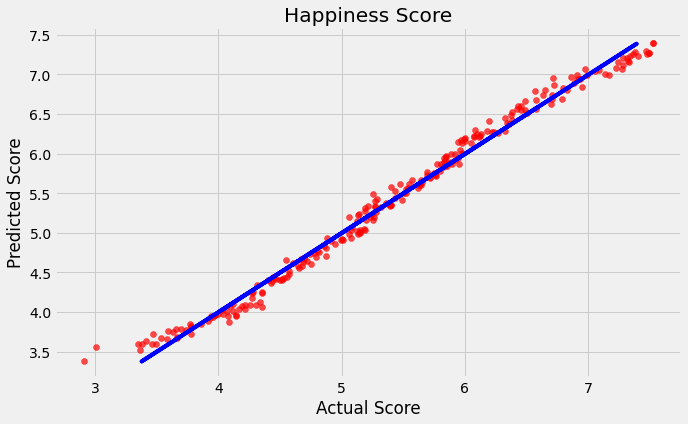

In [ ]:
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'b')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')